In [2]:
import pandas as pd
import csv
import ao3analysismodule as ao3mod #custom module containing helper functions for organizing and filtering the df
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#unpacking the text from csv into two dfs. one is in the format of chapter per row and one in work per row
def csvtodf(filename):
    #sometimes reading the csv throws an eof error. usually running it multiple times will resolve the issue
    tries= 30
    while tries>0:
      try:
        data= pd.read_csv(filename)
        tries= 0
        break
      except:
        print('parsing error, trying again')
        tries-=1

    data= data.fillna('')
    data['expected_chapters']= data['expected_chapters'].replace('', 0)
    data= data.convert_dtypes()

    data['date_edited']=pd.to_datetime(data['date_edited'], utc=True, format='%Y-%m-%d %H:%M:%S')
    data['date_published']=pd.to_datetime(data['date_published'], utc=True, format='%Y-%m-%d %H:%M:%S')
    data['date_updated']=pd.to_datetime(data['date_updated'], utc=True, format='%Y-%m-%d %H:%M:%S')

    data= ao3mod.filterbydate(data, start= '2015-01-01 00:00:00+00:00', end= '2025-12-31 00:00:00+00:00')
    data= ao3mod.filterbylanguage(data, 'English')#filter dataset for english works and works published 2015-2025

    data= data.sort_values(by=['date_published', 'title'])
    data.reset_index(inplace=True, drop=True)

    fulltextdata= data.groupby("workurl").agg(lambda x: list(x.unique()) if x.nunique() > 1 else x.iloc[0])
    fulltextdata= fulltextdata.sort_values(by=['date_published', 'title'])
    fulltextdata.reset_index(inplace=True, drop=True)

    return {'bychapter': data, 'bywork': fulltextdata}

In [4]:
#loading and formatting part of the csv file we will be using
filedf= csvtodf('marvel.csv')
df= filedf['bywork']

/tmp/ipython-input-955789339.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['expected_chapters']= data['expected_chapters'].replace('', 0)


In [5]:
#preview our base dataset
print(df.shape)
print(df.dtypes) #some columns are mixed type
df.head()

(7417, 41)
isoneshot                        boolean
date_edited          datetime64[ns, UTC]
date_published       datetime64[ns, UTC]
date_updated         datetime64[ns, UTC]
bookmarks                          Int64
categories                string[python]
nchapters                          Int64
characters                string[python]
complete                         boolean
comments                           Int64
expected_chapters                  Int64
fandoms                   string[python]
hits                              object
kudos                             object
language                  string[python]
rating                    string[python]
relationships             string[python]
restricted                       boolean
status                    string[python]
summary                   string[python]
tags                      string[python]
title                     string[python]
warnings                  string[python]
id                                 Int64
words

isoneshot               date_edited            date_published  \
0      False 2018-03-04 21:20:17+00:00 2015-01-10 00:00:00+00:00   
1      False 2016-05-17 09:40:36+00:00 2015-01-30 00:00:00+00:00   
2      False 2016-01-07 21:18:40+00:00 2015-05-04 00:00:00+00:00   
3      False 2025-03-12 00:24:41+00:00 2015-05-04 00:00:00+00:00   
4      False 2015-12-13 16:07:30+00:00 2015-05-04 00:00:00+00:00   

               date_updated  bookmarks   categories  nchapters  \
0 2015-12-08 00:00:00+00:00          9          F/M         16   
1 2016-01-01 00:00:00+00:00          0          F/M          3   
2 2016-01-08 00:00:00+00:00        157  F/F,F/M,M/M         46   
3 2015-09-25 00:00:00+00:00        676          M/M          6   
4 2015-12-13 00:00:00+00:00        193      F/M,M/M          2   

                                          characters  complete  comments  ...  \
0  OFC,Original Female Character,Phoenix "Nixy" (...      True         6  ...   
1                                      Loki (Marvel)      True         0  ...   
2  Tony Stark,Natasha Romanov,Clint Barton,Nick Fury     False        52  ...   
3  James "Bucky" Barnes,Tony Stark,Natasha Romano...      True       384  ...   
4     Steve Rogers,Peggy Carter,James "Bucky" Barnes      True        62  ...   

                                          startnotes endnotes  \
0  Hey guys and welcome to chapter one of my new ...            
1                                                               
2  I am officially caught up,  I will be posting ...            
3  Just so everyone is aware, a Drider is a half-...            
4  Shamelessly self indulgent OT3 porn ahead. I w...            

                                          chapterurl  \
0  [https://archiveofourown.org/works/2173080/cha...   
1  [https://archiveofourown.org/works/5598052/cha...   
2  [https://archiveofourown.org/works/3876688/cha...   
3  [https://archiveofourown.org/works/3876607/cha...   
4  [https://archiveofourown.org/works/3877498/cha...   

                                     chapternumwords  \
0  [3376, 2564, 2164, 2979, 2626, 2488, 2114, 265...   
1                                 [5326, 3940, 5436]   
2  [2375, 1803, 1946, 2111, 2705, 1784, 2138, 290...   
3               [4122, 3314, 3199, 3440, 3244, 1905]   
4                                       [4838, 8058]   

                                        chaptertitle  \
0  [Wrongly Attacked, But Its A Walkman, Time to ...   
1  [Interesting Run-In With a God, Overwhelming N...   
2  [Tragic Beginnings, Moth to the Flame, Slippin...   
3  [Following the Trail, , Dinner, Bored Meetings...   
4                                                      

                                      chaptersummary  \
0  [Hello all, here is the first chapter updated!...   
1  [, Loki’s plans are slowly moving into motion,...   
2  [, This Chapter does have an off screen rape s...   
3  [, A little bit of separation can go a long wa...   
4                                                      

                                   chapterstartnotes  \
0  [, Alright chapter two is up and updated! Enjo...   
1                                                      
2  [, (See the end of the chapter for  notes.)\r\...   
3   [, (See the end of the chapter for  notes.)\r\n]   
4  [, So this only took FOREVER! Sorry about that...   

                                     chapterendnotes  \
0  [, Hey guys! I hope you liked the chapter! Nex...   
1                                                      
2  [, I have decided to move the original time li...   
3  [, So, yeah. I've finished writing this partic...   
4                                                      

                                          chapternum  \
0  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
1                                          [1, 2, 3]   
2  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
3                                 [1, 2, 3, 4, 5, 6]   
4                

In [6]:
#getting only columns we may be using as features (dropping all remaining)
modelset= pd.DataFrame() #defining an empty df, this is the one we'll use for our model

#helper function to make sure all items in text rows are lists (so we can append them into longer lists)
def makelist(x):
    if isinstance(x, list):
        return x
    elif pd.isna(x):
        return []
    else:
        return [x]

#reducing our data by grouping together our features based on similar ones
modelset['summaries']= df[['summary', 'chaptersummary']].apply(
    lambda row: sum((makelist(v) for v in row), []),axis=1)
modelset['notes']= df[['startnotes', 'endnotes', 'chapterstartnotes', 'chapterendnotes']].apply(
    lambda row: sum((makelist(v) for v in row), []),axis=1)

#adding in the unmodified information we want from df and reformatting
modelset['words']= df['words']
modelset['text']= df['text']
print(modelset.dtypes)
modelset.head()

summaries    object
notes        object
words         Int64
text         object
dtype: object


summaries  \
0  [\r\nI blamed Quill for the whole thing, or St...   
1  [\r\nEva’s on a moonlit stroll through a quiet...   
2  [\r\nTony Stark had a rough childhood. One day...   
3  [\r\nWhen Bucky's Wolf takes control and follo...   
4  [\r\n“I’m happy for you,” Steve says quickly, ...   

                                               notes   words  \
0  [Hey guys and welcome to chapter one of my new...   38837   
1                                           [, , , ]   14879   
2  [I am officially caught up,  I will be posting...  130671   
3  [Just so everyone is aware, a Drider is a half...   19241   
4  [Shamelessly self indulgent OT3 porn ahead. I ...   12902   

                                                text  
0  [After a limited amount of debate, I decided t...  
1  [E: It was a quiet summer’s night at the park....  
2  [Tony was sitting in his workplace in the lab ...  
3  [There was just something about the Avengers t...  
4  [They are waiting for him together in the boot...

In [7]:
#some columns are mixed type (and can't be automatically converted) so we will convert them manually
modelset= modelset.astype({'summaries' : 'string[python]', 'notes' : 'string[python]',
                           'text' : 'string[python]'})
print(modelset.dtypes)

summaries    string[python]
notes        string[python]
words                 Int64
text         string[python]
dtype: object


[np.int64(38837), np.int64(14879), np.int64(130671), np.int64(19241), np.int64(12902), np.int64(2071), np.int64(39435), np.int64(20580), np.int64(2536), np.int64(4893), np.int64(23166), np.int64(4458), np.int64(12619), np.int64(67057), np.int64(15035), np.int64(4038), np.int64(15772), np.int64(40522), np.int64(24792), np.int64(6004), np.int64(3468), np.int64(49), np.int64(12533), np.int64(96175), np.int64(32217), np.int64(62511), np.int64(32600), np.int64(11232), np.int64(59286), np.int64(52651), np.int64(1678), np.int64(76293), np.int64(7653), np.int64(31692), np.int64(50960), np.int64(41438), np.int64(192653), np.int64(65749), np.int64(72284), np.int64(8941), np.int64(54196), np.int64(27218), np.int64(32075), np.int64(16044), np.int64(7559), np.int64(98854), np.int64(15859), np.int64(139362), np.int64(7210), np.int64(17679), np.int64(7445), np.int64(4161), np.int64(2955), np.int64(7102), np.int64(24930), np.int64(11699), np.int64(136611), np.int64(51690), np.int64(73670), np.int64(49

Text(0.5, 1.0, 'frequency of word counts in dataset')

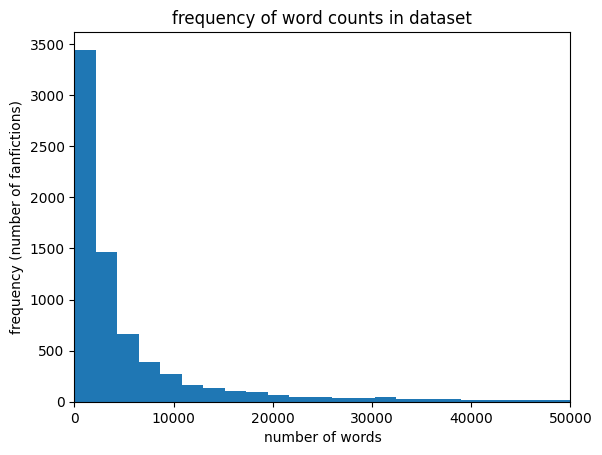

In [8]:
wordcounts= list(modelset.loc[:, 'words'])
print(wordcounts)
plt.hist(wordcounts, bins= 500)
plt.xlim(0, 50000)
plt.xlabel("number of words")
plt.ylabel("frequency (number of fanfictions)")
plt.title("frequency of word counts in dataset")

In [9]:
from nltk.corpus import stopwords
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
import json

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [10]:
#for these text based data--we want to clean it by reducing unhelpful word data like articles or determiners
#use nltk to get parts of speech and remove the ones we don't want
'''
#make a large string of all our text-- this is to identify our unhelpful words
allwords = " ".join(modelset[['summaries', 'notes', 'text']].stack().explode())
tokens= word_tokenize(allwords.lower())
tokens= list(dict.fromkeys(tokens))
taggedallwords= pos_tag(tokens) #tag the instances of words in our texts as parts of speech

#define list of helpful parts of speech
#includes various types of adjectives, nouns, verbs, and interjections
goodpos= ['JJ', 'JJR', 'JJS', 'NN', 'NNP', 'NNS', 'RB', 'RBR', 'RBS', 'UH', 'VB',
          'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
#get a list of unhelpful words
removethesewords= [word for (word, pos) in taggedallwords if pos not in goodpos]
'''

'\n#make a large string of all our text-- this is to identify our unhelpful words\nallwords = " ".join(modelset[[\'summaries\', \'notes\', \'text\']].stack().explode())\ntokens= word_tokenize(allwords.lower())\ntokens= list(dict.fromkeys(tokens))\ntaggedallwords= pos_tag(tokens) #tag the instances of words in our texts as parts of speech\n\n#define list of helpful parts of speech\n#includes various types of adjectives, nouns, verbs, and interjections\ngoodpos= [\'JJ\', \'JJR\', \'JJS\', \'NN\', \'NNP\', \'NNS\', \'RB\', \'RBR\', \'RBS\', \'UH\', \'VB\',\n          \'VBD\', \'VBG\', \'VBN\', \'VBP\', \'VBZ\']\n#get a list of unhelpful words\nremovethesewords= [word for (word, pos) in taggedallwords if pos not in goodpos]\n'

In [11]:
'''
stops= [x.lower() for x in removethesewords] #define stopwords based on our list of words to get rid of

#write our list of stopwords to json, so next time we can use the json file instead of having to process the data again
with open('stopwords.json', 'w') as fil:
    json.dump(stops, fil)
'''
#above functions are commented out since we will have a json to load and use instead

"\nstops= [x.lower() for x in removethesewords] #define stopwords based on our list of words to get rid of\n\n#write our list of stopwords to json, so next time we can use the json file instead of having to process the data again\nwith open('stopwords.json', 'w') as fil:\n    json.dump(stops, fil)\n"

In [12]:
import sklearn
import matplotlib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
from scipy.spatial.distance import cdist

In [13]:
with open('stopwords.json', 'r') as fil:
    stopwords= json.load(fil) #get our list of stopwords to remove from json

print(stopwords)

['``', 'for', 'the', ',', 'or', 'whatever', 'he', 'to', 'himself', 'either', 'it', 'all', 'his', '.', 'if', 'that', 'where', 'i', 'would', 'in', 'at', '19', '!', 'up', 'and', 'she', 'must', 'her', 'of', 'a', "''", 'you', 'and', '...', 'this', "'d", '?', "'but", 'its', "'", 'one', 'my', 'the', 'will', 'on', 'through', "'s", 'before', 'should', 'can', 'out', 'but', 'if', 'any', 'like', 'no', 'two', '(', ')', 'every', 'as', 'because', ':', 'like', 'there', 'them', 'with', '11', '15', 'until', '2', '-hazel\\r\\n', 'during', 'another', 'might', 'from', 'else', 'it', "'ll", 'while', 'over', 'we', 'but', 'some', 'me', 'your', 'around', 'what', '2017', 'when', 'how', 'at', 'which', 'besides', 'one', ';', 'despite', 'avoid', 'could', 'by', 'an', 'iffy', 'heir', 'whenever', 'myself', 'into', 'off', 'since', 'who', 'than', 'without', 'neither', 'nor', 'he', 'because', 'those', 'industries', 'these', 'uncover', 'after', 'they', 'they', 'as', 'this', 'asgardians', 'some', 'etc', 'you', 'me.\\r\\ni'

In [14]:
#vectorize our data (we currently have text but most models rely on numerical representation)
#quick function to make sure all our rows are flattened
def flatten(cell):
    if isinstance(cell, list):
        return " ".join(map(str, cell))
    if cell is None:
        return ""
    return str(cell)

#try using tf-idf (simple)
vectorizers= {}
vectorizedcol= []

#go through each column with text data
for col in ['text']: #text works best
  #make a string representing the text in the column
  columnstring= modelset[col].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
  vec= TfidfVectorizer(
      lowercase=True,
      stop_words= stopwords, #removing less meaningful words
      ngram_range=(1, 3),
      min_df=4 #minimum frequency, below which words are removed
    )
  vectorizedfeat= vec.fit_transform(columnstring) #vectorize our data after making the vectorizer
  vectorizers[col]= vec #keep our vectorizer in case it's needed later
  vectorizedcol.append(vectorizedfeat) #store our vectorized column elsewhere

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['00000000000000000000', '00000000000000000000000', '000000000000000000000000000000001', '0000000003', '0000009', '0000158', '000k', '000lbs', '000th', '001_062997', '002_062997', '003_063197', '00am', '00hrs', '00ish', '00pm', '01010001', '014', '015', '0164', '017', '01am', '01pm', '01x04', '0254', '02am', '02pm', '02x02', '038', '03am', '03pm', '044', '048', '04am', '04pm', '05306', '0557', '056', '059', '05am', '05pm', '060', '063', '067warnings', '06am', '06pm', '070', '07015', '0704192', '075', '07am', '07pm', '087', '0876662gr12', '08am', '08k', '08pm', '092', '098', '09am', '09pm', '0bnju5ksr1c', '1000000000', '10023', '10036', '100ths', '10166', '1037', '103b', '105f', '10601', '10amchloe', '10oz', '10pm36', '10ths', '10yr', '11000', '11052', '1112123', '1129', '1131', '1132', '1151'

In [15]:
#combine our text matrices (these will be used later in model usage)
modelmatrix= hstack(vectorizedcol)

In [16]:
#further dimension reduction-- we only have one feature now, but it's still very complex for explaining effects of features
#truncated svd is a kind of latent semantic analysis--helpful in finding usage patterns for words
from sklearn.decomposition import TruncatedSVD

svd= TruncatedSVD(n_components=100) #100 is recommended for lsa based on documentation
reducedmatrix= svd.fit_transform(modelmatrix)

In [17]:
#show us how much of our data is explained by svd
explained= svd.explained_variance_ratio_
print(np.cumsum(explained))

[0.01815612 0.04756208 0.07015249 0.08710933 0.10199556 0.11671106
 0.12892102 0.14036396 0.15061301 0.15924973 0.166331   0.17279336
 0.17875852 0.18408899 0.18883647 0.19302129 0.19668773 0.20032447
 0.20379975 0.20713604 0.21027664 0.21315678 0.21597887 0.21867091
 0.22131886 0.22393819 0.22650112 0.22903809 0.23136058 0.23367487
 0.23582087 0.23791085 0.23996073 0.24196058 0.24392401 0.24583498
 0.24770263 0.24952746 0.25129723 0.25304168 0.25465131 0.25623154
 0.25776671 0.25924368 0.260706   0.26211438 0.26352478 0.2648881
 0.26622711 0.26754726 0.26875569 0.26994567 0.27112436 0.27229831
 0.27345902 0.2746114  0.27572947 0.27683942 0.27794214 0.27903797
 0.28012342 0.28119751 0.28224634 0.28326566 0.28426961 0.28525572
 0.28622608 0.2871823  0.28812539 0.28905728 0.28996198 0.29086289
 0.29175804 0.29262921 0.29347752 0.29430879 0.29512712 0.29593708
 0.29674406 0.29753796 0.29830897 0.29907679 0.29983501 0.30058556
 0.30133216 0.30206998 0.30280455 0.3035333  0.30424422 0.30494

testing clustering for k=10
testing clustering for k=11
testing clustering for k=12
testing clustering for k=13
testing clustering for k=14
testing clustering for k=15
testing clustering for k=16
testing clustering for k=17
testing clustering for k=18
testing clustering for k=19
testing clustering for k=20
testing clustering for k=21
testing clustering for k=22
testing clustering for k=23
testing clustering for k=24
testing clustering for k=25
testing clustering for k=26
testing clustering for k=27
testing clustering for k=28
testing clustering for k=29
testing clustering for k=30
testing clustering for k=31
testing clustering for k=32
testing clustering for k=33
testing clustering for k=34
testing clustering for k=35
testing clustering for k=36
testing clustering for k=37
testing clustering for k=38
testing clustering for k=39
testing clustering for k=40
testing clustering for k=41
testing clustering for k=42
testing clustering for k=43
testing clustering for k=44
testing clustering f

Text(0.5, 1.0, 'elbow plot (k means)')

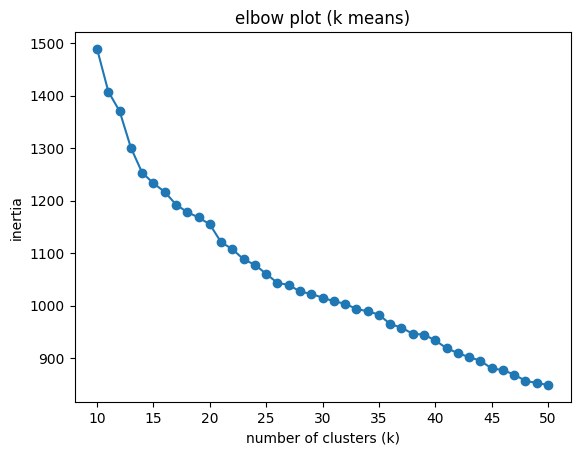

In [18]:
#test possibility of unsupervised learning/k means
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

#start by finding the best number of clusters (via elbow method)
#we'll estimate between 10-51 as a reasonable number for genre
inertias=[]
for i in range(10, 51):
  print(f'testing clustering for k={i}')
  kmeans = KMeans(n_clusters=i, random_state= 432)
  kmeans.fit(reducedmatrix)
  inertias.append(kmeans.inertia_)

#visualize the inertias
plt.figure()
plt.plot(range(10, 51), inertias, marker='o')
plt.xlabel("number of clusters (k)")
plt.ylabel("inertia")
plt.title('elbow plot (k means)')

#elbow plot does not show a place where the model flattens

In [19]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from collections import Counter

In [20]:
#try using dbscan instead
#we have 7417 data points. if more than half is noise, we should adjust the parameters
dbscan= DBSCAN(eps= 0.3, min_samples=10, metric='euclidean')
labels= dbscan.fit_predict(reducedmatrix)

n_clusters= len(set(labels)) - (1 if -1 in labels else 0)
n_noise= list(labels).count(-1)

print(f"Estimated clusters: {n_clusters}")
print(f"Estimated noise points: {n_noise}")

Estimated clusters: 6
Estimated noise points: 1540


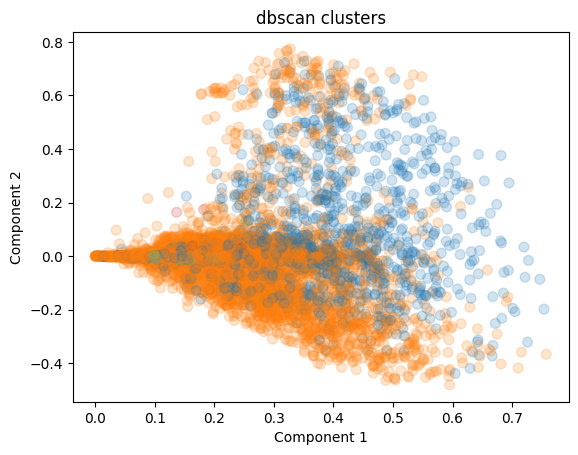

In [36]:
#try to visualize our clusters
svd2= TruncatedSVD(n_components=2, random_state=42)
vispoints= svd2.fit_transform(reducedmatrix)

plt.scatter(vispoints[:, 0], vispoints[:, 1], c=labels, cmap='tab10', s=50, alpha= 0.2)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("dbscan clusters")
plt.show()

#most are clustered on one side, with some outliers way on the right
#xlim zooms in on our non-outlier points

In [22]:
#we now have clusters of something. let's see what these clusters describe

clustereps= {}
#for each cluster identified in dbscan
for c in np.unique(labels):
  if c== -1: #ignore points that are noise (marked as being in cluster -1)
    continue

  #get the items in the matrix that are labeled as being in cluster c
  clustrows= reducedmatrix[labels == c]
  centroid= clustrows.mean(axis=0) #get centroid

  #get distances and choose the 3 closest fanfictions to the centroid
  distances= cdist(clustrows, centroid.reshape(1, -1)).flatten()
  closest_local_indices= np.argsort(distances)[:3]
  cluster_member_indices= np.where(labels== c)[0].flatten()
  original_indices= cluster_member_indices[closest_local_indices]

  #add indices of representative fanfictions to the list
  clustereps[c]= original_indices


In [23]:
print(clustereps)

{np.int64(0): array([7308, 6459, 2561]), np.int64(1): array([3800, 1234,  277]), np.int64(2): array([5877, 5362, 1018]), np.int64(3): array([3667, 1192, 5360]), np.int64(4): array([7407, 6180, 4363]), np.int64(5): array([7033, 7381, 7067])}


In [24]:
from wordcloud import WordCloud

In [31]:
#get the most common non-stopwords in the text of each representative
i=0
mostcommonwords= {}
for cluster in clustereps:
  alltokens= []
  for idx in clustereps[cluster]:
    texts= modelset.iloc[idx, 3].lower() #get text from modelset for this row and lowercase it
    tokens= word_tokenize(texts) #tokenize and remove stopwords
    alltokens= alltokens+[word for word in tokens if word not in stopwords and len(word)>3]

  wordfreq= Counter(alltokens)
  mostcommonwords[f'{i}']= dict(Counter(wordfreq).most_common(50))
  i+=1

print(mostcommonwords)


{'0': {'cody': 234, 'ryder': 103, 'taylor': 84, 'back': 67, 'more': 50, 'just': 43, 'team': 42, 'eyes': 40, 'little': 38, 'were': 37, 'have': 35, 'then': 35, 'miller': 35, 'mind': 33, 'down': 32, 'other': 32, 'time': 32, 'mrs.': 32, 'even': 29, 'know': 29, 'program': 29, 'well': 28, 'much': 28, 'again': 28, 'face': 27, 'hair': 27, 'turned': 26, 'hand': 25, 'such': 25, 'mentors': 25, 'mentor': 25, 'being': 25, 'only': 24, 'look': 23, 'captain': 23, 'head': 23, 'enough': 23, 'been': 22, 'quite': 22, 'made': 22, 'levine': 22, 'voice': 21, 'felt': 21, 'sure': 20, 'took': 19, 'making': 19, 'thought': 18, 'once': 18, 'something': 18, 'candidates': 18}, '1': {'jack': 198, 'brock': 189, 'back': 43, 'were': 26, 'down': 26, 'fingers': 22, 'just': 21, 'felt': 19, 'eyes': 19, 'head': 16, 'hand': 16, 'have': 16, 'said': 15, 'been': 15, 'hands': 15, 'more': 14, 'little': 14, 'something': 14, 'fuck': 13, 'always': 12, 'small': 12, 'door': 12, 'face': 12, 'other': 12, 'being': 12, 'still': 12, 'moved'

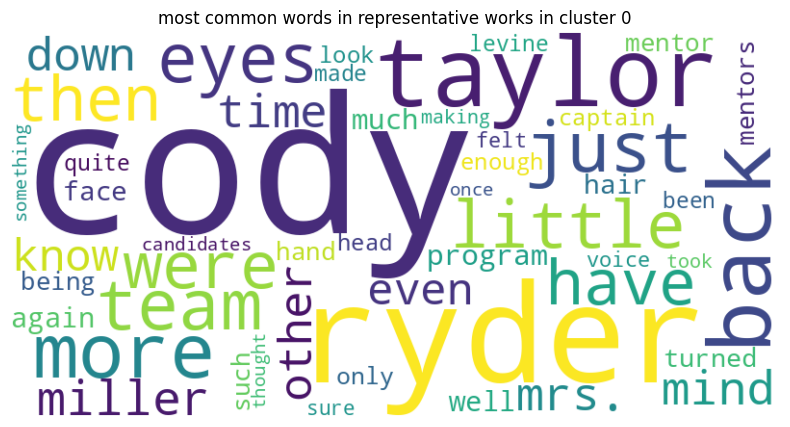

<Figure size 640x480 with 0 Axes>

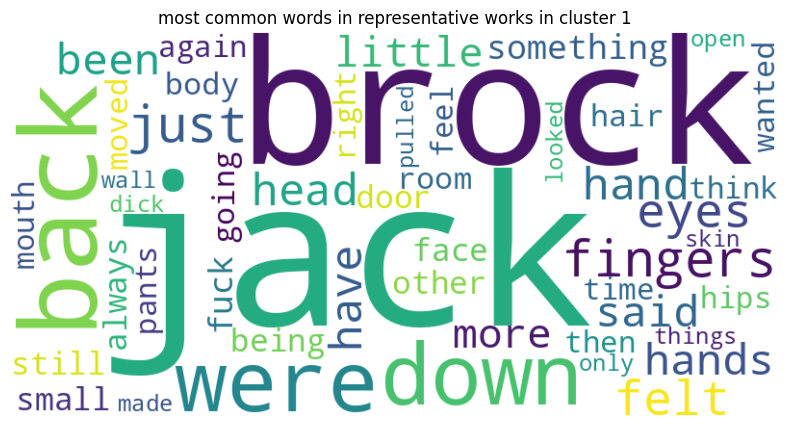

<Figure size 640x480 with 0 Axes>

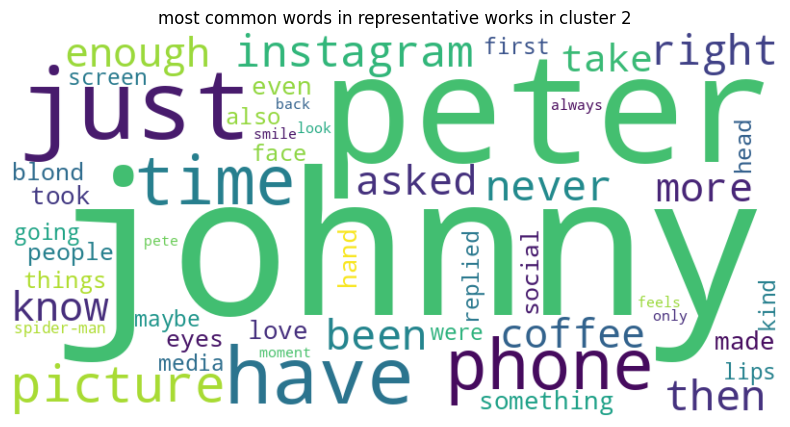

<Figure size 640x480 with 0 Axes>

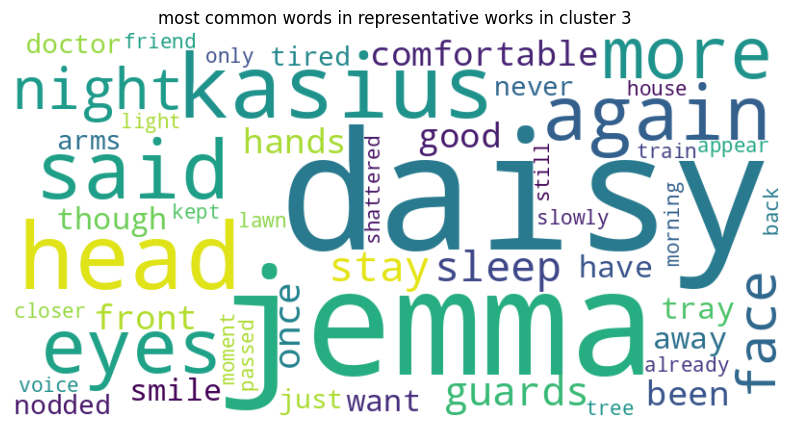

<Figure size 640x480 with 0 Axes>

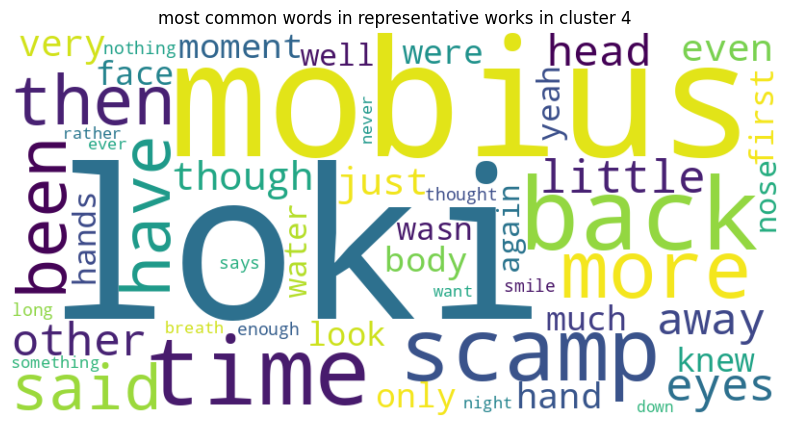

<Figure size 640x480 with 0 Axes>

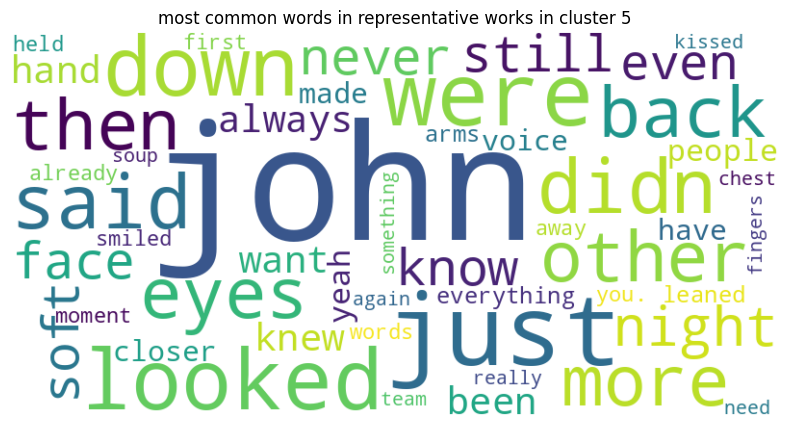

<Figure size 640x480 with 0 Axes>

In [32]:
i=0
for c in mostcommonwords:
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(mostcommonwords[c])

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f"most common words in representative works in cluster {i}")
  plt.show()
  plt.savefig(f'wordcloud cluster {i} words')

  i+=1

In [28]:
#get the tags of most representative works
i=0
reptags= {}
for cluster in clustereps:
  alltags= []
  for idx in clustereps[cluster]:
    tags= df.iloc[idx, 20].split(',') #get tags from df
    alltags= alltags+tags

  reptags[f'{i}']= alltags
  i+=1

print(reptags)

{'0': ['Slice of Life', 'Reminiscing', 'Avengers Team as Teenagers', 'Mentioned Avengers Team (Marvel)', 'I Wrote This Instead of Sleeping', 'Teenage Drama', 'Alternate Universe - Teenagers', 'Angst', 'Hurt/Comfort', 'Hurt No Comfort', 'Training', 'Team Up', 'Self-Doubt', 'Doubt', 'Teen Crush', 'Fluff', 'How Do I Tag', 'Flashbacks', 'Friendship', 'Developing Friendships', 'Heroes & Heroines', 'Cultural Differences', 'Past Relationship(s)', 'Past Abuse', 'implied - Freeform', 'Fluff'], '1': ['Mental Health Issues', 'Healing', 'Healthy Relationships', 'Human distaster Brock Rumlow', 'Emotional Hurt/Comfort', 'Emotional Sex', 'Anal Sex', 'Reunited and It Feels So Good', 'Murder Husbands', 'Ambiguous/Open Ending', 'Kind Of', 'Brock Pov', 'Alternate Universe - Modern Setting', "Valentine's Day", "Valentine's Day Gifts", 'Fluff', 'Kinda?', 'Brock And Jack Name Calling Out Of Affection', 'Name-Calling', 'Affection', 'Surprises', 'Brock Can Crack Into A Bit Of A Romantic For Once', 'Married Co

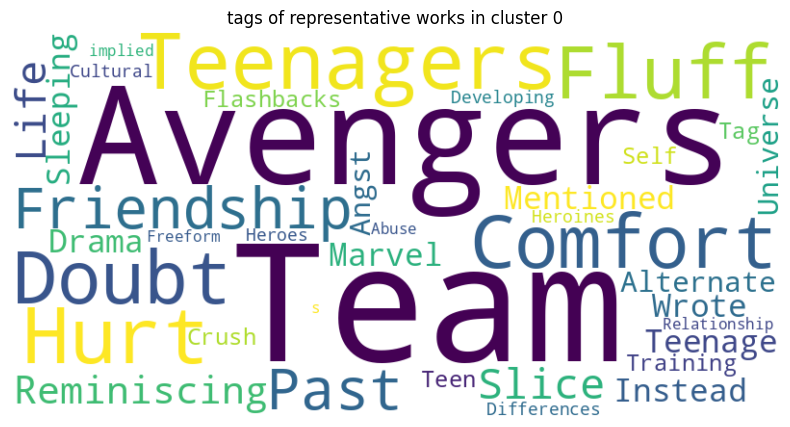

<Figure size 640x480 with 0 Axes>

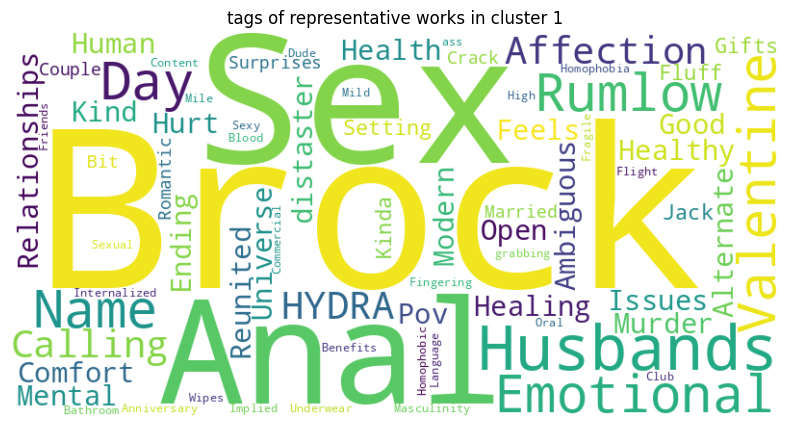

<Figure size 640x480 with 0 Axes>

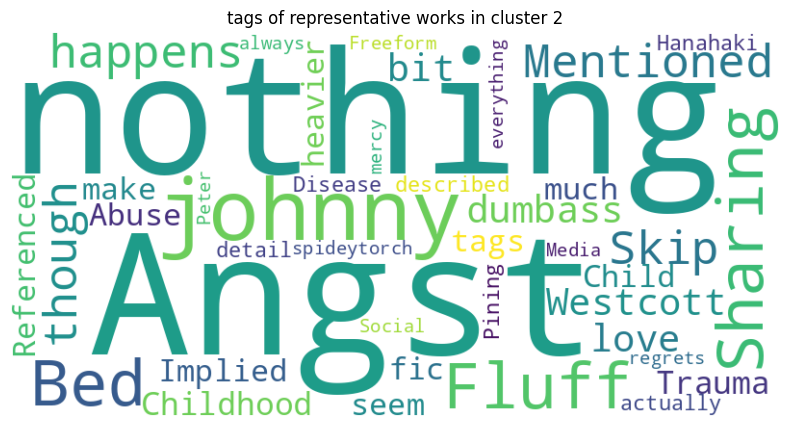

<Figure size 640x480 with 0 Axes>

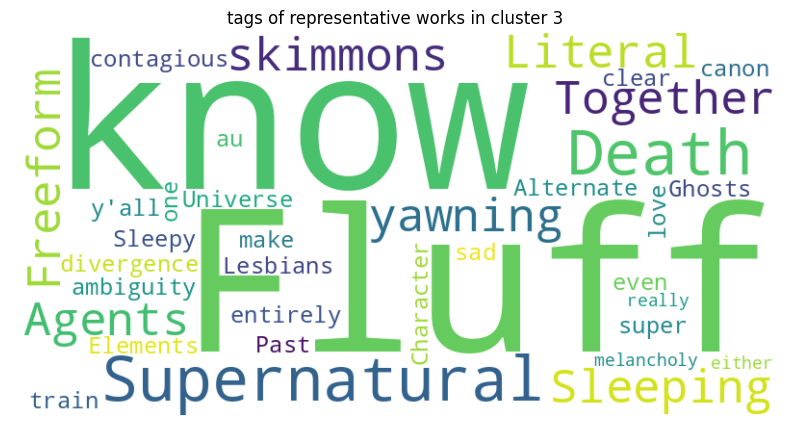

<Figure size 640x480 with 0 Axes>

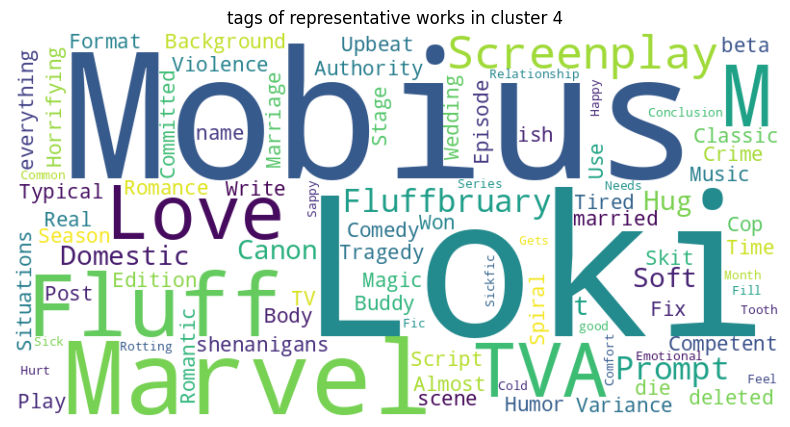

<Figure size 640x480 with 0 Axes>

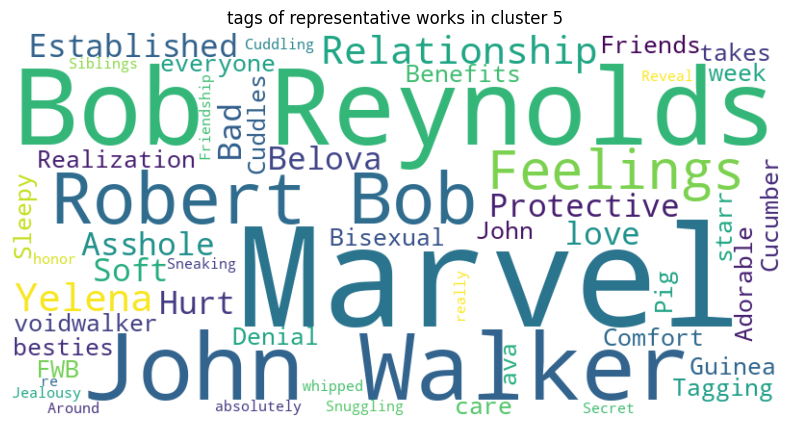

<Figure size 640x480 with 0 Axes>

In [27]:
i=0
for c in reptags:
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(reptags[c]))

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f"tags of representative works in cluster {i}")
  plt.show()
  plt.savefig(f'wordcloud cluster {i} tags')

  i+=1